# Проект

Для выполнения задач этого проекта вам потребуется весь полученный ранее опыт. А применять его мы будем к теме, которая будоражит умы человечества с начала 2020 года: мы будем анализировать данные о заражениях COVID-19. 

Вы будете работать с данными, актуальными на 18 сентября 2020 года. Для начала скачайте данные из [источника](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.json) и сохраните их в файл covid.json.

В коде для проверки нашей системой используйте путь data/covid.json.

На самом верхнем уровне находится словарь, в котором ключ — это код страны. В значении лежат данные по стране. Полное название страны лежит в поле location. Кроме поля location в данных есть несколько полей с общей статистикой:

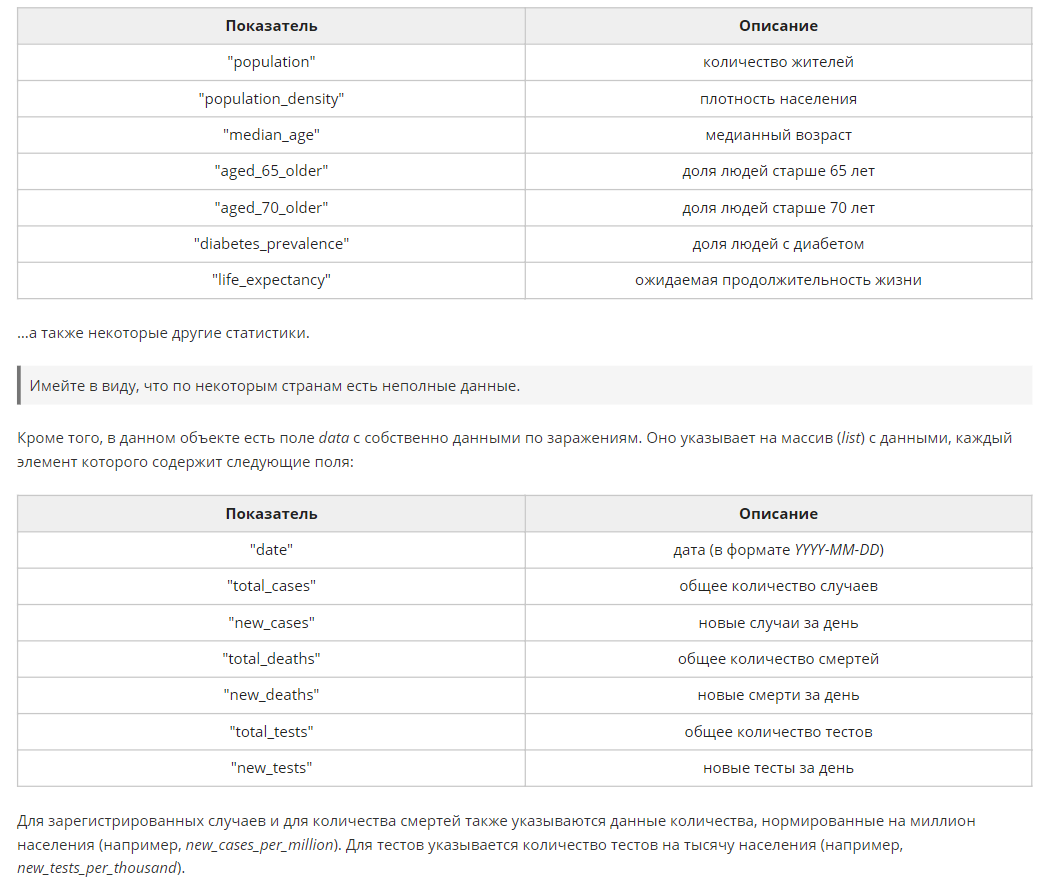

**Имейте в виду, что не все страны передают все данные, поэтому какие-то поля могут отсутствовать.**

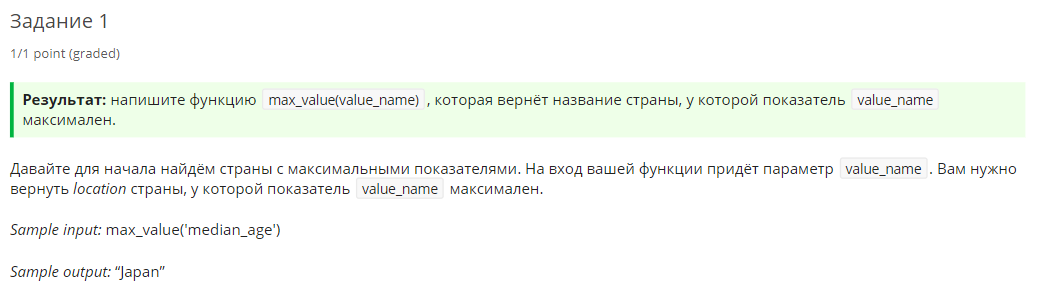

In [2]:
import json
# Напишите ваш код ниже
def max_value(value_name):
    import json
#     with open(r'data/covid.json') as f:
    with open(r'C:\Users\snkna\Downloads\covid.json') as f:
        d = json.load(f)
    dic = {}
    for i in d.keys():
        if value_name in d[i].keys():
            dic[i]=d[i][value_name]
        else:
            dic[i]=0
    v=list(dic.values())
    k=list(dic.keys())
    return d[k[v.index(max(v))]]['location']

max_value('median_age')

'Japan'

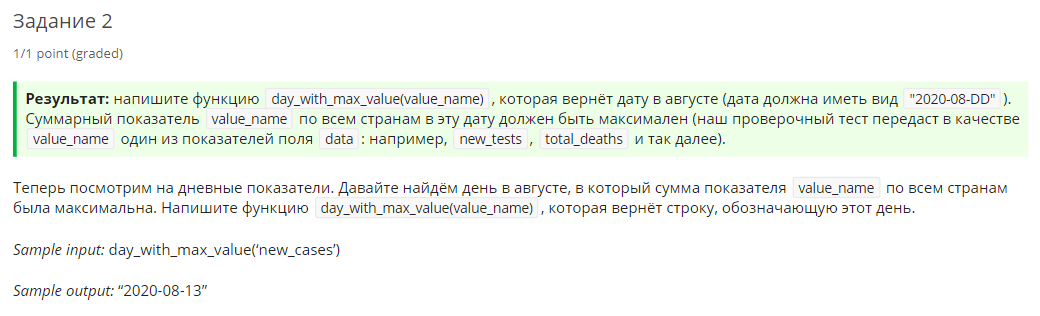

In [3]:
import json
# Напишите ваш код ниже
def day_with_max_value(value_name):
    import json
#     with open(r'data/covid.json') as f:
    with open(r'C:\Users\snkna\Downloads\covid.json') as f:
        d = json.load(f)
    dic = {}
    summ = 0
    for i in d.keys():
        for j in d[i]['data']:
            if value_name in j.keys() and ('2020-08-' in j['date']):
                dic[j['date']]=dic.get(j['date'],0)+j[value_name]       
    v=list(dic.values())
    k=list(dic.keys())
    return k[v.index(max(v))]

day_with_max_value('new_cases')

'2020-08-13'

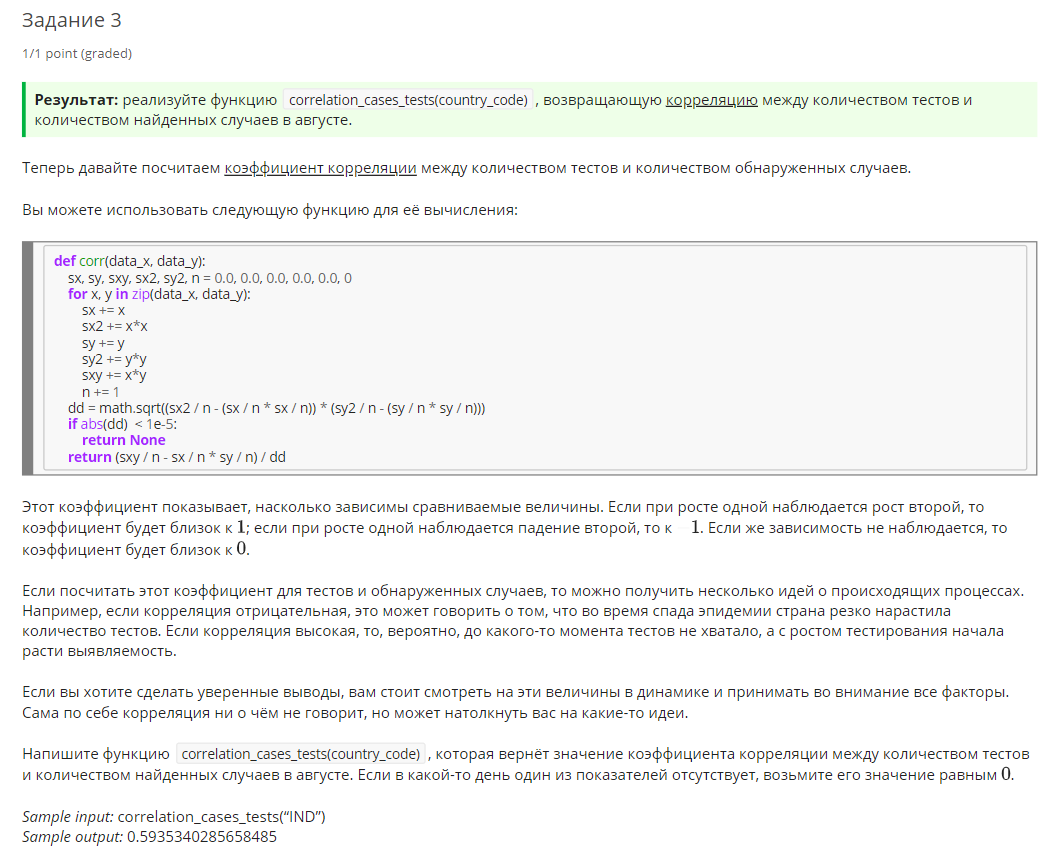

In [4]:
import json
# Напишите ваш код ниже
def corr(data_x, data_y):
    import math
    sx, sy, sxy, sx2, sy2, n = 0.0, 0.0, 0.0, 0.0, 0.0, 0
    for x, y in zip(data_x, data_y):
        sx += x
        sx2 += x*x
        sy += y
        sy2 += y*y
        sxy += x*y
        n += 1
    dd = math.sqrt((sx2 / n - (sx / n * sx / n)) * (sy2 / n - (sy / n * sy / n)))
    if abs(dd) < 1e-5:
        return None
    return (sxy / n - sx / n * sy / n) / dd
    
def float_with_precision(country_code):
    import json
#     with open(r'data/covid.json') as f:
    with open(r'C:\Users\snkna\Downloads\covid.json') as f:
        d = json.load(f)
    dic = {}
    summ = 0
    total_tests_list = []
    total_cases_list = []
    for j in d[country_code]['data']:
        if 'new_tests'  in j.keys() and ('2020-08-' in j['date']):
            total_tests_list.append( j['new_tests'])
        if  'new_cases' in j.keys() and ('2020-08-' in j['date']):
            total_cases_list.append( j['new_cases'])
        if 'new_tests'  not in j.keys()  and ('2020-08-' in j['date']):
            total_tests_list.append(0)
        if 'new_cases' not in j.keys() and ('2020-08-' in j['date']):
            total_cases_list.append( 0)
    if corr(total_cases_list,total_tests_list) is None:
        return 0
    else:
        return corr(total_cases_list,total_tests_list)
    
float_with_precision('IND')

0.5935340285658485

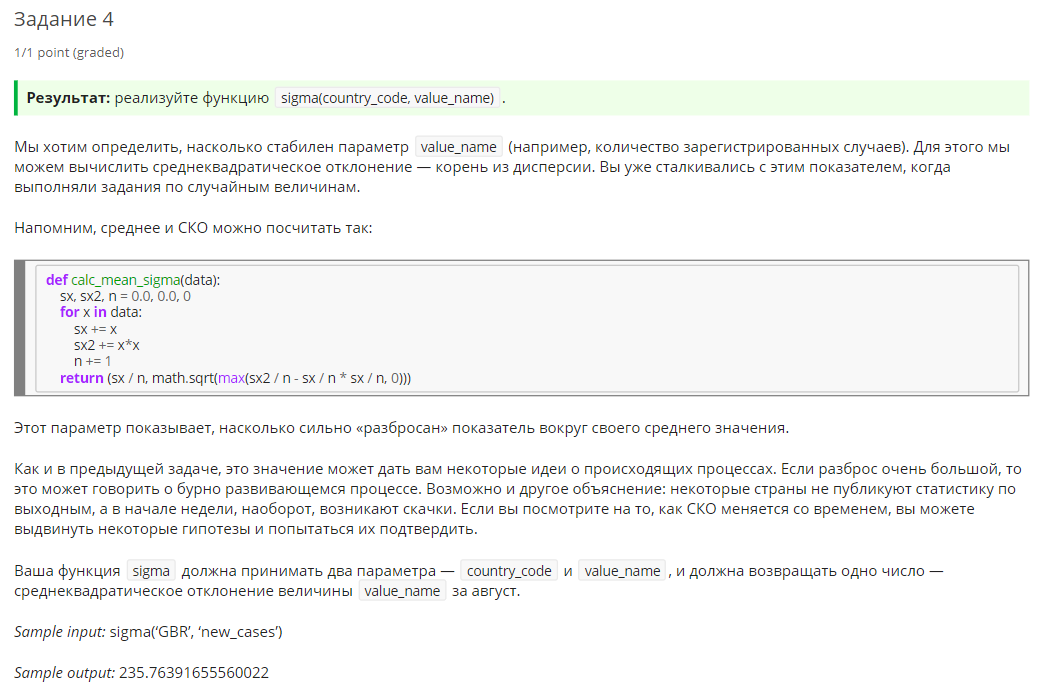

In [5]:
import json, math
# Напишите ваш код ниже
def calc_mean_sigma(data):
    sx, sx2, n = 0.0, 0.0, 0
    for x in data:
        sx += x
        sx2 += x*x
        n += 1
    return (sx / n, math.sqrt(max(sx2 / n - sx / n * sx / n, 0)))
def sigma(country_code, value_name):
    import json
#     with open(r'data/covid.json') as f:
    with open(r'C:\Users\snkna\Downloads\covid.json') as f:
        d = json.load(f)
    dic = {}
    summ = 0
    new_cases = []
    for j in d[country_code]['data']:
        if  ('2020-08-' in j['date']):
            new_cases.append(j.get(value_name, 0))
    return calc_mean_sigma(new_cases)[1]

sigma('GBR','new_cases')

235.76391655560022

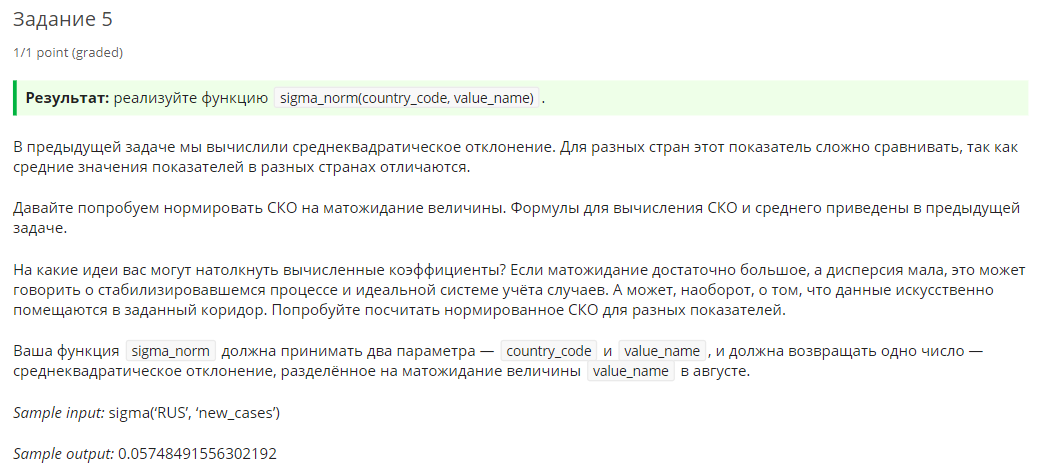

In [8]:
import json, math
# Напишите ваш код ниже

import json, math
# Напишите ваш код ниже
def calc_mean_sigma(data):
    sx, sx2, n = 0.0, 0.0, 0
    for x in data:
        sx += x
        sx2 += x*x
        n += 1
    return (sx / n, math.sqrt(max(sx2 / n - sx / n * sx / n, 0)))
def sigma_norm(country_code, value_name):
    import json
#     with open(r'data/covid.json') as f:
    with open(r'C:\Users\snkna\Downloads\covid.json') as f:
        d = json.load(f)
    dic = {}
    summ = 0
    new_cases = []
    for j in d[country_code]['data']:
        if  ('2020-08-' in j['date']):
            new_cases.append(j.get(value_name, 0))
    return calc_mean_sigma(new_cases)[1]/ calc_mean_sigma(new_cases)[0]

sigma_norm('RUS','new_cases')

0.05748491556302192